# El método de Newton tradicional

Recordemos que el *método de Newton* es un método numérico *iterativo* para encontrar raíces de funciones (continuamente) diferenciables.

Sea $f$ la función cuyas raíces queremos encontrar.
La idea es que empecemos desde una adivinanza inicial $x_0$, y que la siguiente aproximación se calcula como sigue.

**[1]** (i) En general, $x_0$ *no* es una raíz. Suponiendo que $x_0$ esté cerca de una raíz, sea $x_0 + \delta x$ la raíz. Expande $f$ en una serie de Taylor a primer orden para encontrar una expresión aproximada para $\delta x$, y de ahí de la siguiente aproximación $x_1 := x_0 + \delta x$.


* Sea $x$ raíz de $f$ tal que $x = x_0 + \delta x$ y $f(x_0) \approx 0 $ 

$ f(x) = f(x_0 + \delta x) \approx f(x_0) +\delta x \ f'(x_0)$ 

$ x\approx x_1 = x_0  - \dfrac{f(x_0) }{ f'(x_0 )} $

(ii) Dé una interpretación geométrica de este resultado.

*  Se toma la pendiente de la tangente en $x_0$ y se calcula la insercción con $y = 0$, la cual una mejor aproximación a la raíz

(iii) Dibuja unas cuantas iteraciones en la computadora, con todo y la interpretación geométrica, para una función nolineal que escojas. 

* Considermos $f(x) = x^2 - 2$ y $x_0 = 1$ 

In [1]:
using Plots
pyplot()

Plots.PyPlotBackend()

x0 = 1.3402027004047208
x0 = 1.2646341054289276
x0 = 1.2599385927540572



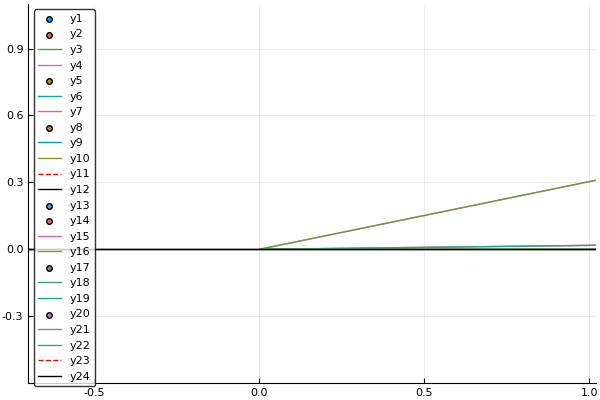

In [3]:
f(x) = x^3 - 2
fp(x) = 3*x^2
x0 = 0.99
xs = linspace(-0.7 , pi/2, 20)
#plot(xlim = (-0.7, 1.02), ylim = (-0.6, 1.1)) 
scatter!((x0, f(x0)))

for i in 1:3
    xa = x0
    x0 = x0 - f(x0)/fp(x0)
    scatter!((x0,f(x0)))
    plot!([x0, xa], [f(x0), f(xa)])
    plot!([x0, 0], [f(x0), 0] ) 
    @show x0
end
plot!(xs, f.(xs), line = :dash, c= "red")
plot!([-2, 2], [0, 0], color = "black") 


**[2]** (i) Escribe una función `newton` que implementa la iteración para calcular una raíz de una función $f$, dada una adivinza inicial $x_0$. Utiliza diferenciación automática para calcular la derivada.

(ii) Utiliza tu código para calcular la raíz cuadrada y la raíz cúbica de $2$.  

(iii) ¿Cuál es una condición razonable de terminación del algoritmo? 

In [4]:
using ForwardDiff

In [5]:
function newton(f,x0)
    i = 0
    e = 2e-10
    while i<=10
        g = x0 -> ForwardDiff.derivative(f, x0)
        x0 = x0 - f(x0)/g(x0)
        i += 1
    end
    return x0
end

newton (generic function with 1 method)

* Calculemos la raíz cuadrada de 2, para ello consideremos la función `f(x) = x^2 - 2`

In [6]:
f(x) = x^2 - 2 
xs = newton(f, 10*rand())

1.4142135623730951

In [7]:
xs^2 == 2

false

* Ahora la raíz cubica de 3, con la función `g(x) = x^3 - 2`

In [8]:
ff(x) = x^3 - 2
xz = newton(ff, 10*rand())

1.2599210498948732

In [9]:
xz^3 == 2.0

true

**[3]** ¿Cómo es la convergencia del método hacia una raíz:

- cuando se empieza cerca de la raíz;

- cuando se empieza lejos.

[Pista: Utiliza `BigFloat` para obtener información más útil.]

In [10]:
x1 = newton(ff, 100)
x2 = newton(ff, 1.2)
x3 = newton(ff, 5)
x4 = newton(ff, 0.4)
println("Lejos de la raíz \n")
@show BigFloat(x1)
println("\n")
println("Cerca de la raíz \n")
@show BigFloat(x2)
@show BigFloat(x3)
@show BigFloat(x4)

Lejos de la raíz 

BigFloat(x1) = 1.436947500449804460131986161286476999521255493164062500000000000000000000000000


Cerca de la raíz 

BigFloat(x2) = 1.259921049894873190666544360283296555280685424804687500000000000000000000000000
BigFloat(x3) = 1.259921049894873190666544360283296555280685424804687500000000000000000000000000
BigFloat(x4) = 1.259921049894873190666544360283296555280685424804687500000000000000000000000000


1.259921049894873190666544360283296555280685424804687500000000000000000000000000

Vemos que si comenzamos cerca de la raíz el resultado converge a `1.259921049894873190666544360283296555280685424804687500000000000000000000000000`, pero lejos de la raíz **NO** converge a la raíz

## El método de Newton **puede fallar**

El método de Newton funciona muy bien a veces, pero también puede fallar:

**[4]** Utiliza el método de Newton para encontrar raíces *en el plano complejo*. Empezando desde distintos números complejos $a + bi$, itera el algoritmo para ver a cuál raíz converge, y colorea el punto inicial de manera correspondiente. [Pista: distingue a los puntos iniciales según la componente imaginaria de la raíz a la cual convergen.]

Interpreta el resultado.

In [11]:
x0=10*rand() + 10*rand()im
ffp = x0 -> ForwardDiff.derivative(ff, x0)

(::#3) (generic function with 1 method)

In [12]:
ffp(x0)

LoadError: [91mMethodError: no method matching derivative(::#ff, ::Complex{Float64})[0m
Closest candidates are:
  derivative(::F, [91m::R<:Real[39m) where {F, R<:Real} at /Users/porras/.julia/v0.6/ForwardDiff/src/derivative.jl:13
  derivative(::Any, [91m::AbstractArray[39m, [91m::Real[39m) at /Users/porras/.julia/v0.6/ForwardDiff/src/derivative.jl:27
  derivative(::Any, [91m::AbstractArray[39m, [91m::Real[39m, [91m::ForwardDiff.DerivativeConfig{T,D} where D[39m) where T at /Users/porras/.julia/v0.6/ForwardDiff/src/derivative.jl:27
  ...[39m

In [20]:
z1 = newton(ff, x0) 

LoadError: [91mMethodError: no method matching derivative(::#ff, ::Complex{Float64})[0m
Closest candidates are:
  derivative(::F, [91m::R<:Real[39m) where {F, R<:Real} at /Users/porras/.julia/v0.6/ForwardDiff/src/derivative.jl:13
  derivative(::Any, [91m::AbstractArray[39m, [91m::Real[39m) at /Users/porras/.julia/v0.6/ForwardDiff/src/derivative.jl:27
  derivative(::Any, [91m::AbstractArray[39m, [91m::Real[39m, [91m::ForwardDiff.DerivativeConfig{T,D} where D[39m) where T at /Users/porras/.julia/v0.6/ForwardDiff/src/derivative.jl:27
  ...[39m

## Dimensión superior

El método de Newton se puede extender para encontrar raíces de funciones en dimensión superior, es decir de funciones $\mathbf{f}: \mathbb{R}^n \to \mathbb{R}^n$.

**[5]** (i) Desarrolla el algoritmo del método de Newton para funciones $\mathbf{f}: \mathbb{R}^n \to \mathbb{R}^n$. Para hacerlo, toma una adivinaza inicial $\mathbf{x}_0$ y extiende el desarrollo de la pregunta (1) a este caso.

(ii) ¿Qué tipo de cálculos necesitas poder hacer en Julia para implementar este algoritmo de forma numérica? ¿Cómo se lleva a cabo esto en Julia?

(iii) Escribe una función que implementa el algoritmo. 

(iv) Encuentra raíces de funciones multidimensionales cuyas raíces conoces, para verificar que el algoritmo funcione.